**Importing the Required Libraries**

In [33]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


**Reading the csv file**

In [34]:
df = pd.read_csv('/content/movie.csv')
print(df.head())

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [36]:
df.isnull().sum() # display if any null vlaue is present (here none)

,0
text,0
label,0


**Removing duplicates**

In [37]:
string_columns = df.select_dtypes(include='object').columns
for col in string_columns: #condtion to check if the text column contains any duplicte values
    duplicates = df[df.duplicated(subset=[col],keep = False)]
    if not duplicates.empty:
        print(f"Duplicate values in column '{col}':")
        print(duplicates[[col]].drop_duplicates())
        print()


Duplicate values in column 'text':
                                                    text
202    "Go Fish" garnered Rose Troche rightly or wron...
253    A fun romp...a lot of good twists and turns! (...
266    Mean spirited, and down right degrading adapta...
339    (Spoilers)<br /><br />Oh sure it's based on Mo...
654    You do realize that you've been watching the E...
...                                                  ...
35351  No redeeming features, this film is rubbish. I...
35957  Jack Frost returns with an army of Styrofoam b...
36970  It's been a long time since I last saw a movie...
37517  Les Visiteurs, the first movie about the medie...
38359  There's something frustrating about watching a...

[269 rows x 1 columns]



In [ ]:
df_new = df.drop_duplicates() #dropping the duplicates
print(df_new)

                                                    text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[39723 rows x 2 columns]


In [39]:
df_new.describe()

,label
count,39723.000000
mean,0.501171
std,0.500005
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


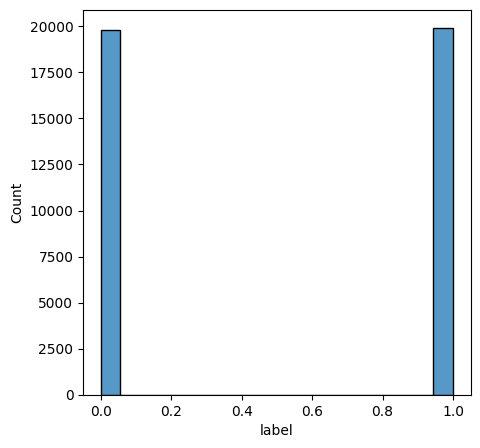

In [40]:
plt.figure(figsize=(5,5))
sns.histplot(df_new['label'])
plt.show()

**Removing any stopwords from the Movie reviews**

In [41]:
stop_words = set(stopwords.words('english'))
def rmv_stopwords(text):
    text = str(text)
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df_new['fltr_text'] = df_new['text'].apply(rmv_stopwords)
print(df_new['fltr_text'])

0        grew ( b . 1965 ) watching loving Thunderbirds...
1        put movie DVD player , sat coke chips , expect...
2        people know particular time past like feel nee...
3        Even though great interest Biblical movies , b...
4        Im die hard Dads Army fan nothing ever change ...
                               ...                        
39995    `` Western Union '' something forgotten classi...
39996    movie incredible piece work . explores every n...
39997    wife watched movie plan visit Sicily Stromboli...
39998    first watched Flatliners , amazed . necessary ...
39999    would film good , gross estimated $ 95,000,000...
Name: fltr_text, Length: 39723, dtype: object


**Removing any emoticons and special Characters**

In [42]:
def sym_rmv(text):
    text = str(text)
    text = re.sub(r'[\U00010000-\U0010FFFF]', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df_new['fltr_text'] = df_new['fltr_text'].apply(sym_rmv)
print(df_new['fltr_text'])

0        grew b 1965 watching loving Thunderbirds mates...
1        put movie DVD player sat coke chips expectatio...
2        people know particular time past like feel nee...
3        Even though great interest Biblical movies bor...
4        Im die hard Dads Army fan nothing ever change ...
                               ...                        
39995    Western Union something forgotten classic west...
39996    movie incredible piece work explores every noo...
39997    wife watched movie plan visit Sicily Stromboli...
39998    first watched Flatliners amazed necessary feat...
39999    would film good gross estimated 95000000 award...
Name: fltr_text, Length: 39723, dtype: object


In [ ]:
df_new['fltr_text'] = df_new['fltr_text'].str.lower() # Converting text to lowercase
df_new # Printing the newly preprocessed dataframe

,text,label,fltr_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic west...
39996,This movie is an incredible piece of work. It ...,1,movie incredible piece work explores every noo...
39997,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...
39998,"When I first watched Flatliners, I was amazed....",1,first watched flatliners amazed necessary feat...


In [44]:
def tokenizer(text):
  text = str(text)
  return word_tokenize(text)
df_new['tokens'] = df_new['fltr_text'].apply(tokenizer) # Generating a final dataframe with tokenized sentences
df_new

,text,label,fltr_text,tokens
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 1965 watching loving thunderbirds mates...,"[grew, b, 1965, watching, loving, thunderbirds..."
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...,"[put, movie, dvd, player, sat, coke, chips, ex..."
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...,"[people, know, particular, time, past, like, f..."
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...,"[im, die, hard, dads, army, fan, nothing, ever..."
...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic west...,"[western, union, something, forgotten, classic..."
39996,This movie is an incredible piece of work. It ...,1,movie incredible piece work explores every noo...,"[movie, incredible, piece, work, explores, eve..."
39997,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...,"[wife, watched, movie, plan, visit, sicily, st..."
39998,"When I first watched Flatliners, I was amazed....",1,first watched flatliners amazed necessary feat...,"[first, watched, flatliners, amazed, necessary..."


**Stemming**

In [45]:
def stem_words(text):
    text = str(text)
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(word) for word in text]
df_new['stemmed_text'] = df_new['tokens'].apply(stem_words)
df_new['stemmed_text']

,stemmed_text
0,"[[, ', g, r, e, w, ', ,, , ', b, ', ,, , ', ..."
1,"[[, ', p, u, t, ', ,, , ', m, o, v, i, e, ', ..."
2,"[[, ', p, e, o, p, l, e, ', ,, , ', k, n, o, ..."
3,"[[, ', e, v, e, n, ', ,, , ', t, h, o, u, g, ..."
4,"[[, ', i, m, ', ,, , ', d, i, e, ', ,, , ', ..."
...,...
39995,"[[, ', w, e, s, t, e, r, n, ', ,, , ', u, n, ..."
39996,"[[, ', m, o, v, i, e, ', ,, , ', i, n, c, r, ..."
39997,"[[, ', w, i, f, e, ', ,, , ', w, a, t, c, h, ..."
39998,"[[, ', f, i, r, s, t, ', ,, , ', w, a, t, c, ..."


**Lemmatization**

In [46]:
def get_wordnet_pos(tag):  # Applying pos tags to words for greater accuracy in lemmatization
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_passage(text): # Function to lemmatize a text
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence
df_new['lemmatized_text'] = df_new['fltr_text'].apply(lemmatize_passage)
df_new['lemmatized_text']

,lemmatized_text
0,grow b 1965 watch love thunderbird mat school ...
1,put movie dvd player sit coke chip expectation...
2,people know particular time past like feel nee...
3,even though great interest biblical movie bore...
4,im die hard dad army fan nothing ever change g...
...,...
39995,western union something forgotten classic west...
39996,movie incredible piece work explore every nook...
39997,wife watch movie plan visit sicily stromboli s...
39998,first watched flatliners amaze necessary featu...


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_new['lemmatized_text'], df_new['label'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31778,), (7945,), (31778,), (7945,))

**Bag Of Words using Count Vectorization**

In [48]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
print(X_train_cv.toarray())
sorted(cv.vocabulary_.keys())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['00',
 '000',
 '0000000000001',
 '00000001',
 '000001',
 '0001',
 '001',
 '002',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '009',
 '00agent',
 '00s',
 '01',
 '010',
 '010606',
 '010707',
 '0110',
 '012310',
 '0126',
 '02',
 '029',
 '03',
 '030',
 '03092005',
 '0310',
 '039',
 '03oct2009',
 '04',
 '04082007',
 '044',
 '048',
 '05',
 '050',
 '0510',
 '053105',
 '06',
 '0615',
 '06and',
 '07',
 '08',
 '081006',
 '081475',
 '0815',
 '087',
 '089',
 '08th',
 '09',
 '09082009',
 '091505',
 '0and',
 '0clock',
 '0f',
 '0ne',
 '0stars',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '10000000',
 '100000000',
 '1000000000',
 '10000000000',
 '1000000000000010',
 '100000dm',
 '10002000',
 '10005000',
 '1000pm',
 '1000word',
 '1000wordstory',
 '1001',
 '100100',
 '100200',
 '100219',
 '1004',
 '100603',
 '100am',
 '100bt',
 '100ft',
 '100k',
 '100miles',
 '100minute',
 '100minutelong',
 '100percent',
 '100plus',
 '100th',
 '100x',
 '100year',
 '100yearold',
 '101',
 '1010',
 '1011',


**TF-IDF**

In [49]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
df_tfidf = pd.DataFrame(X_train_tfidf[0].T.todense(),index = tfidf.get_feature_names_out(),columns = ['TF-IDF'])
df_tfidf.sort_values(by = 'TF-IDF',ascending = False)

,TF-IDF
rain,0.472483
unemotional,0.332858
dustin,0.290138
trivial,0.284861
artificial,0.263098
...,...
fluctuation,0.000000
fluctuate,0.000000
flubs,0.000000
flubbergasted,0.000000


**Logistic Regression Model**


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3991
           1       0.88      0.90      0.89      3954

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



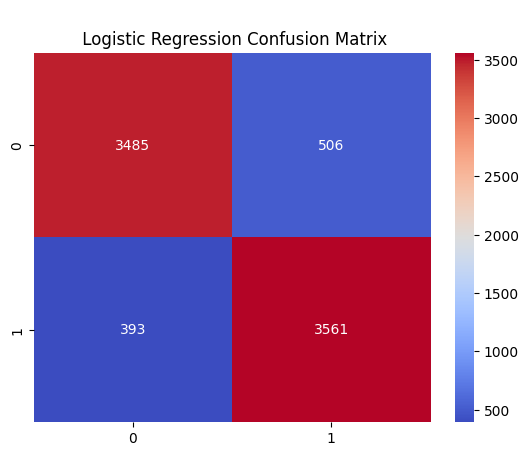

In [50]:
logrg = LogisticRegression()
logrg.fit(X_train_tfidf, y_train)
preds = logrg.predict(X_test_tfidf)
print(f"\n Logistic Regression Classification Report:")
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap = 'coolwarm')
plt.title(f'\n Logistic Regression Confusion Matrix')
plt.show()

**Naive - Bayes Classification**


 Naive-Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3991
           1       0.87      0.83      0.85      3954

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



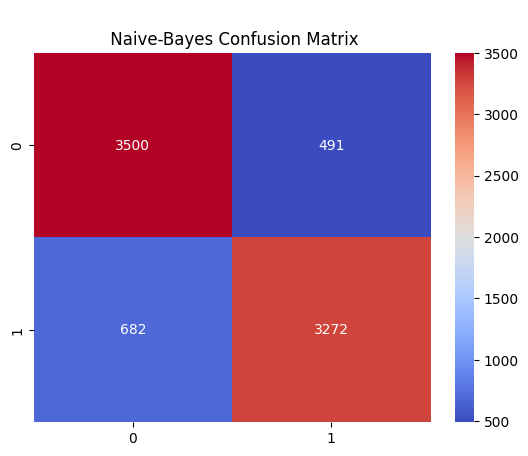

In [51]:
nvmby = BernoulliNB()
nvmby.fit(X_train_tfidf, y_train)
preds = nvmby.predict(X_test_tfidf)
print(f"\n Naive-Bayes Classification Report:")
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap = 'coolwarm')
plt.title(f'\n Naive-Bayes Confusion Matrix')
plt.show()

**Support - Vector Machine Model**


 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3991
           1       0.88      0.90      0.89      3954

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



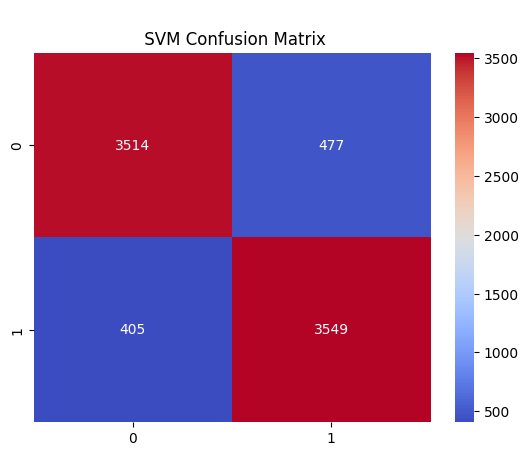

In [52]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
preds = svm.predict(X_test_tfidf)
print(f"\n SVM Classification Report:")
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap = 'coolwarm')
plt.title(f'\n SVM Confusion Matrix')
plt.show()

**Random Forest Model**


 Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3991
           1       0.86      0.85      0.85      3954

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



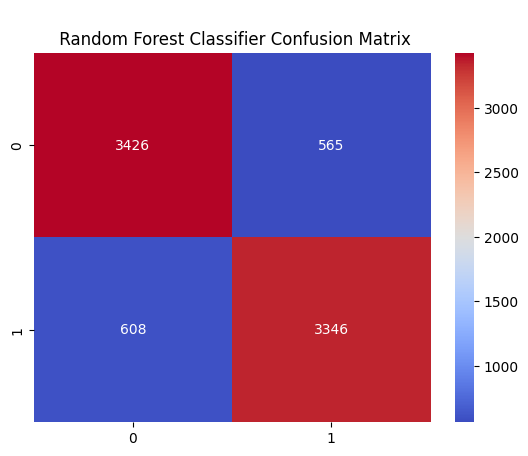

In [53]:
rndfst = RandomForestClassifier()
rndfst.fit(X_train_tfidf, y_train)
preds = rndfst.predict(X_test_tfidf)
print(f"\n Random Forest Classifier Classification Report:")
print(classification_report(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap = 'coolwarm')
plt.title(f'\n Random Forest Classifier Confusion Matrix')
plt.show()